# Predicting Application success and enhancing user engagement using machine learning algorithms

In [58]:
 from google.colab import files
uploaded=files.upload()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Saving googleplaystore.csv to googleplaystore (1).csv


# ***Importing necessary libraries and reading the data from a csv file.***

In [59]:
#IMPORTING DATA
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
data=pd.read_csv("googleplaystore.csv")
data



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


# *DATA PRE-PROCESSING - Checking for missing values,duplicates,data types of columns(features) and unique apps.*

In [60]:
data.isnull().sum() #for identifying missing values in each column

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0
App,0
Category,0
Rating,1474
Reviews,0
Size,0
Installs,0
Type,1
Price,0
Content Rating,1
Genres,0


In [61]:
data.columns #displaying all columns(features)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [62]:
# Describe method automatically performs operations on data and shows count,mean,standard deviation,min,max and etc.
print(data.describe())
print(data.describe)

            Rating
count  9367.000000
mean      4.193338
std       0.537431
min       1.000000
25%       4.000000
50%       4.300000
75%       4.500000
max      19.000000
<bound method NDFrame.describe of                                                      App             Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                    Coloring book moana       ART_AND_DESIGN   
2      U Launcher Lite – FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                  Sketch - Draw & Paint       ART_AND_DESIGN   
4                  Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
...                                                  ...                  ...   
10836                                   Sya9a Maroc - FR               FAMILY   
10837                   Fr. Mike Schmitz Audio Teachings               FAMILY   
10838                             Parkinson Exercices FR          

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [63]:
data['App'].nunique() # displaying number of unique apps in the dataset

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


9660

In [64]:
data['Category'].nunique() #displaying number of unique categories in the dataset

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


34

In [65]:
data['Category'].unique() #displaying unique appsin the dataset

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

# ***DATA CLEANING - removing duplicates,handling missing values,converting datatypes,removing outliers,standardizing columns etc.***

In [66]:
#DATA CLEANING
# Drop duplicates from data
apps = data.drop_duplicates(subset='App')

# Print the total number of apps
print('Total number of apps in the dataset = ', len(apps))

# Display a random sample of 5 rows
print(apps.head())

Total number of apps in the dataset =  9660
                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018    

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [67]:
#Displaying columns containing missing values using list comprehension
[features for features in data.columns if data[features].isnull().sum()>0]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['Rating', 'Type', 'Content Rating', 'Current Ver', 'Android Ver']

In [68]:
#Displaying most common category of apps by finding its mode
mode_value = data['Category'].mode()[0]
print("The most common category is:",mode_value)

The most common category is: FAMILY


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [69]:
#Displaying most common category of apps by finding its mode
mode_value = data['Rating'].mode()[0]
print("The most common ratings are:",mode_value)

The most common ratings are: 4.4


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [70]:
#filling missing values in rating column by its mean
data['Rating']= data['Rating'].fillna(data['Rating'].mean())
print("missing values after filling:",data['Rating'])

missing values after filling: 0        4.100000
1        3.900000
2        4.700000
3        4.500000
4        4.300000
           ...   
10836    4.500000
10837    5.000000
10838    4.193338
10839    4.500000
10840    4.500000
Name: Rating, Length: 10841, dtype: float64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [71]:
#filling missing values in type column by its mode
data['Type']= data['Type'].fillna(data['Type'].mode())
print("missing values after filling:",data['Type'])

missing values after filling: 0        Free
1        Free
2        Free
3        Free
4        Free
         ... 
10836    Free
10837    Free
10838    Free
10839    Free
10840    Free
Name: Type, Length: 10841, dtype: object


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#filling missing values in content rating column by its mode
data['Content Rating']= data['Content Rating'].fillna(data['Content Rating'].mode())
print("missing values after filling:",data['Content Rating'])

missing values after filling: 0          Everyone
1          Everyone
2          Everyone
3              Teen
4          Everyone
            ...    
10836      Everyone
10837      Everyone
10838      Everyone
10839    Mature 17+
10840      Everyone
Name: Content Rating, Length: 10841, dtype: object


In [72]:
#dropping least influencing features(columns) for the analysis
data.drop(['Last Updated','Current Ver','Android Ver'], axis=1, inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [73]:
data.columns = data.columns.str.strip()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [74]:
print(data.columns.tolist())


['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [75]:
#Convert 'Reviews' to numeric datatype
data['Reviews'] = pd.to_numeric(data['Reviews'], errors='coerce')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [76]:
# Cleaning 'Installs' column by removing '+' and ',' characters
# Replacing 'Free' or non-numeric values with NaN and convert to float
data['Installs'] = data['Installs'].replace('Free', '0')
data['Installs'] = data['Installs'].str.replace('[+,]', '', regex=True).astype(float)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [77]:
#Standardize 'Size' column
# Function to convert 'Size' to numeric (handling 'M' and 'k' units)
def size_to_numeric(size):
    if 'M' in size:
        return float(size.replace('M', ''))
    elif 'k' in size:
        return float(size.replace('k', '')) / 1024  # Convert kB to MB
    else:
        return None

data['Size'] = data['Size'].replace('Varies with device', None)  # Replace 'Varies with device' with NaN
data['Size'] = data['Size'].apply(lambda x: size_to_numeric(x) if isinstance(x, str) else x)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [78]:
# for checking if the data are cleaned -View a specific row  by its index position (e.g., 236th row)
print(data.iloc[236])


App                      Box
Category            BUSINESS
Rating                   4.2
Reviews             159872.0
Size                     NaN
Installs          10000000.0
Type                    Free
Price                      0
Content Rating      Everyone
Genres              Business
Name: 236, dtype: object


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [79]:
# Save the cleaned dataset to a CSV file
data.to_csv('cleaned_google_playstore_data.csv', index=False)
data

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.100000,159.0,19.0,10000.0,Free,0,Everyone,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.900000,967.0,14.0,500000.0,Free,0,Everyone,Art & Design;Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.700000,87510.0,8.7,5000000.0,Free,0,Everyone,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.500000,215644.0,25.0,50000000.0,Free,0,Teen,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.300000,967.0,2.8,100000.0,Free,0,Everyone,Art & Design;Creativity
...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.500000,38.0,53.0,5000.0,Free,0,Everyone,Education
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.000000,4.0,3.6,100.0,Free,0,Everyone,Education
10838,Parkinson Exercices FR,MEDICAL,4.193338,3.0,9.5,1000.0,Free,0,Everyone,Medical
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.500000,114.0,NaN,1000.0,Free,0,Mature 17+,Books & Reference


In [80]:
print(data.head())

                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

    Reviews  Size    Installs  Type Price Content Rating  \
0     159.0  19.0     10000.0  Free     0       Everyone   
1     967.0  14.0    500000.0  Free     0       Everyone   
2   87510.0   8.7   5000000.0  Free     0       Everyone   
3  215644.0  25.0  50000000.0  Free     0           Teen   
4     967.0   2.8    100000.0  Free     0       Everyone   

                      Genres  
0               Art & Design  
1  Art & Design;Pretend Play  
2               Art & Design  
3               Art & Design  
4  

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# ***DATA VISUALIZATION - visualizing the cleaned dataset to draw insights and patterns***

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


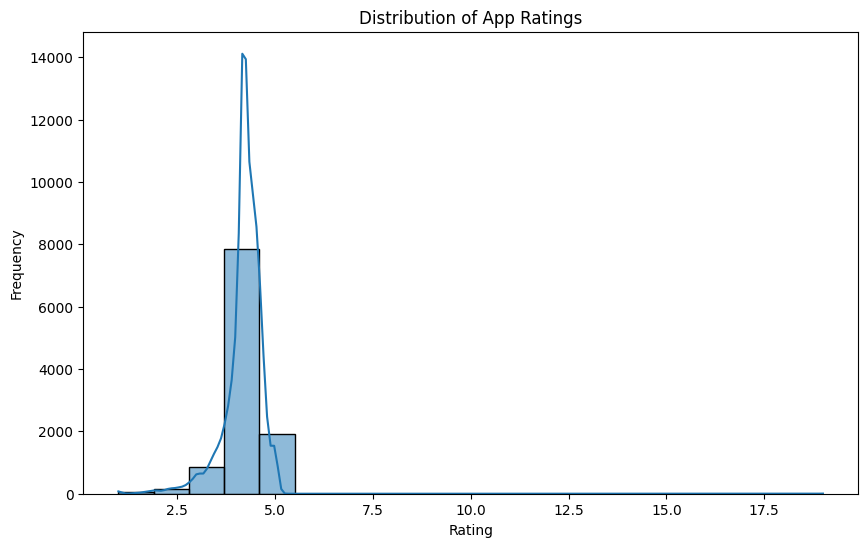

In [81]:
#Data visualization
#Plotting Distribution of app ratings
plt.figure(figsize=(10, 6))
sns.histplot(data['Rating'], bins=20, kde=True)
plt.title('Distribution of App Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


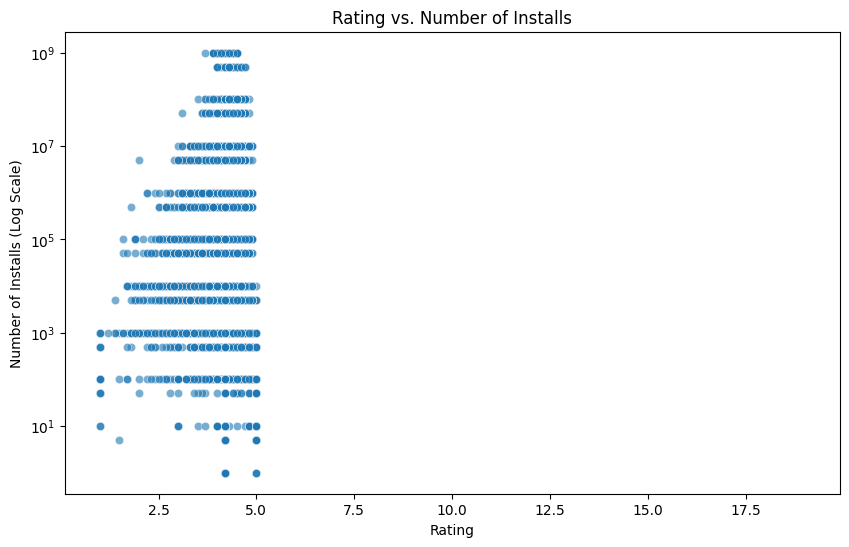

In [82]:
# Scatter plot of Rating vs Installs # relationship b/w ratings and installs
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Rating', y='Installs', alpha=0.6)
plt.xscale('linear')
plt.yscale('log')  # Log scale for better visibility
plt.title('Rating vs. Number of Installs')
plt.xlabel('Rating')
plt.ylabel('Number of Installs (Log Scale)')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


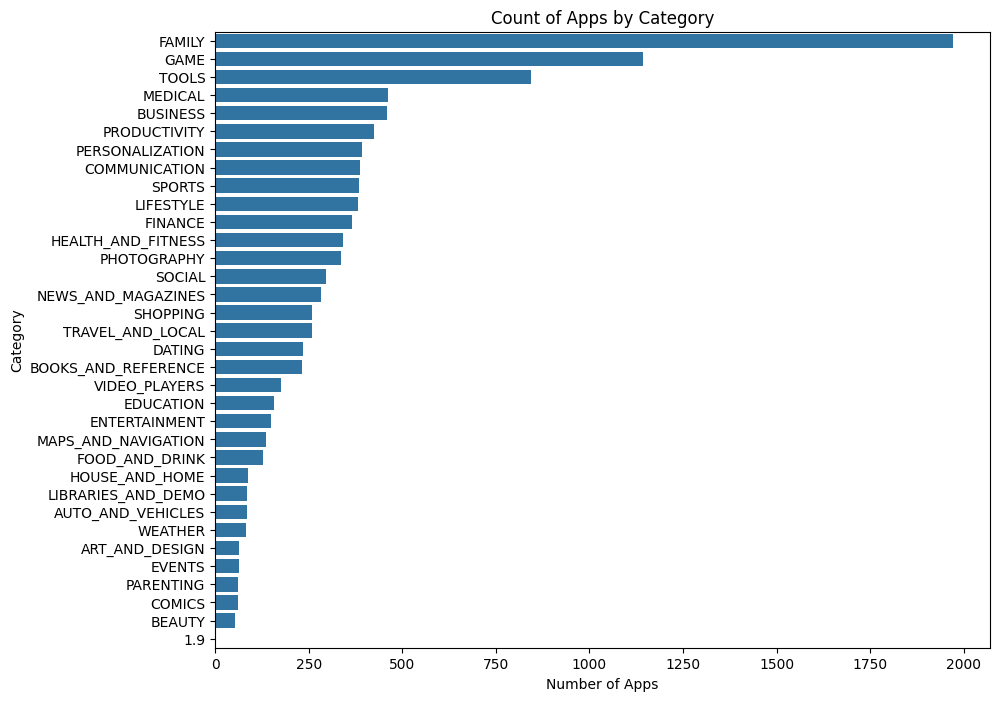

In [83]:
# distribution of Apps across diff Categories # count
plt.figure(figsize=(10, 8))
sns.countplot(data=data, y='Category', order=data['Category'].value_counts().index)
plt.title('Count of Apps by Category')
plt.xlabel('Number of Apps')
plt.ylabel('Category')
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


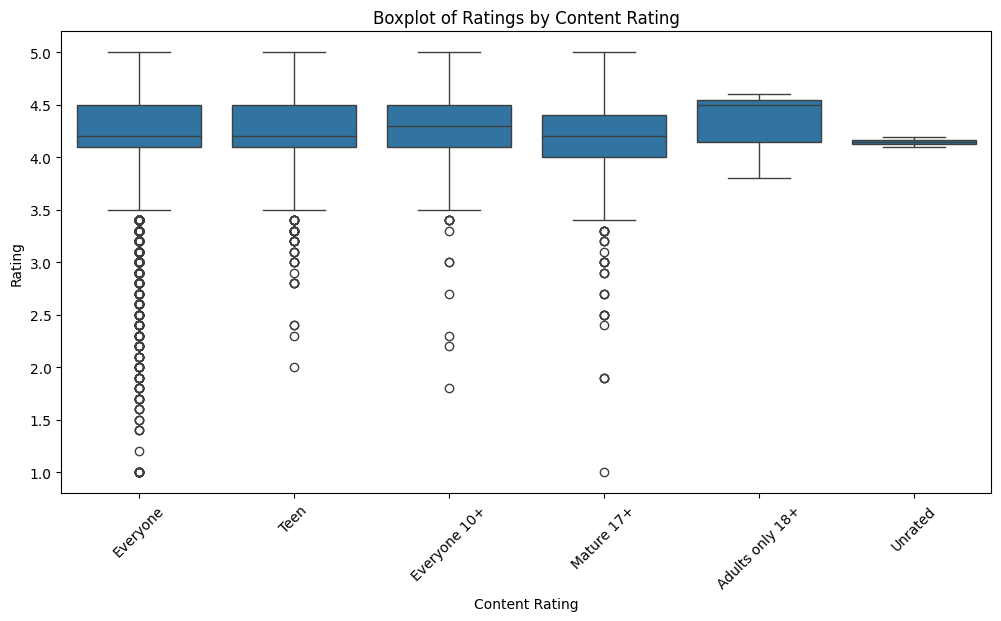

In [84]:
# Boxplot of Ratings by Content Rating
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='Content Rating', y='Rating')
plt.title('Boxplot of Ratings by Content Rating')
plt.xlabel('Content Rating')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.show()



In [85]:
#cleaning price column
numerical_data = data[['Price', 'Rating', 'Reviews', 'Installs', 'Size']] #creating a new dataframe with numerical types
numerical_data['Price'] = numerical_data['Price'].astype(str)  # Convert to string to ensu-re consistent replacement

# Remove '$' and ',' symbols
numerical_data['Price'] = numerical_data['Price'].str.replace('$', '', regex=False)
numerical_data['Price'] = numerical_data['Price'].str.replace(',', '', regex=False)

# Convert to numeric, coercing errors to NaN
numerical_data['Price'] = pd.to_numeric(numerical_data['Price'], errors='coerce')
# Fill NaN values with 0 or another appropriate value
numerical_data['Price'].fillna(0, inplace=True)

# Check unique values
print(numerical_data['Price'].unique())

[  0.     4.99   3.99   6.99   1.49   2.99   7.99   5.99   3.49   1.99
   9.99   7.49   0.99   9.     5.49  10.    24.99  11.99  79.99  16.99
  14.99   1.    29.99  12.99   2.49  10.99   1.5   19.99  15.99  33.99
  74.99  39.99   3.95   4.49   1.7    8.99   2.     3.88  25.99 399.99
  17.99 400.     3.02   1.76   4.84   4.77   1.61   2.5    1.59   6.49
   1.29   5.    13.99 299.99 379.99  37.99  18.99 389.99  19.9    8.49
   1.75  14.     4.85  46.99 109.99 154.99   3.08   2.59   4.8    1.96
  19.4    3.9    4.59  15.46   3.04   4.29   2.6    3.28   4.6   28.99
   2.95   2.9    1.97 200.    89.99   2.56  30.99   3.61 394.99   1.26
   1.2    1.04]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-85-1171c6741de0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical_data['Price'] = numerical_data['Price'].astype(str)  # Convert to string to ensu-re consistent replacement
<ipython-input-85-1171c6741de0>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-86-209e8e7eee4c>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical_data['Price'] = numerical_data['Price'].astype(str)
<ipython-input-86-209e8e7eee4c>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

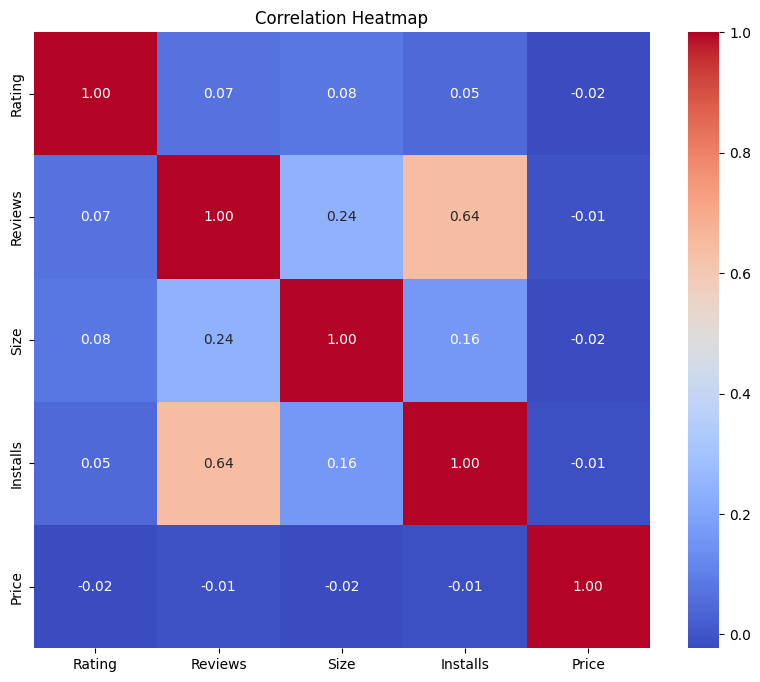

In [86]:
# Heatmap of correlation matrix #Visualize the correlation between numerical features in the dataset.
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd # Import pandas for to_numeric

plt.figure(figsize=(10, 8))
numerical_data = data[['Rating', 'Reviews', 'Size', 'Installs', 'Price']]

# Convert 'Price' column to numeric, handling non-numeric values
numerical_data['Price'] = numerical_data['Price'].astype(str)
numerical_data['Price'] = numerical_data['Price'].str.replace('$', '', regex=False) # Remove '$'
numerical_data['Price'] = numerical_data['Price'].str.replace(',', '', regex=False) # Remove ','
numerical_data['Price'] = pd.to_numeric(numerical_data['Price'], errors='coerce') # Convert to numeric, invalid parsing will be set as NaN
numerical_data['Price'].fillna(0, inplace=True) # Replace NaN with 0

correlation_matrix = numerical_data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar=True)
plt.title('Correlation Heatmap')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-87-4b8524e835ef>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=success_rate, x='Category', y='Success', palette='viridis')


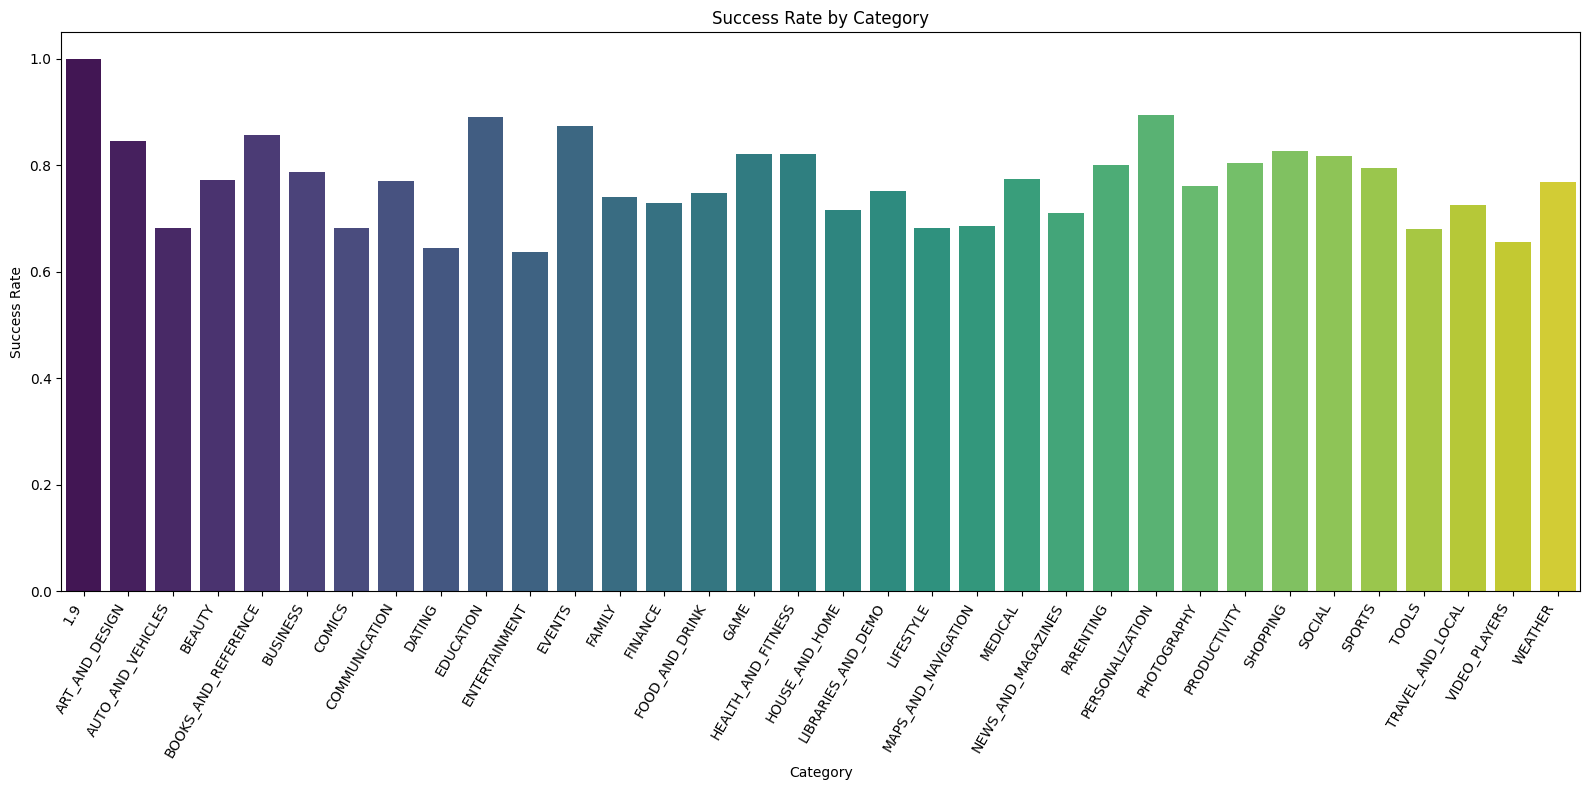

In [87]:
# Calculating success rate by category(Visualize the success rate (e.g., number of successful apps) by category.)
#'Rating' above 4.0 indicates success # creating a new column 'Success'

data['Success'] = (data['Rating'] > 4.0).astype(int)  # 1 if 'Rating' is above 4.0, else 0
success_rate = data.groupby('Category')['Success'].mean().reset_index()

# Plot the success rate by category with improved visualization
plt.figure(figsize=(16, 8))  # Larger figure size for clarity
sns.barplot(data=success_rate, x='Category', y='Success', palette='viridis')

plt.title('Success Rate by Category')
plt.xlabel('Category')
plt.ylabel('Success Rate')

# Rotate x-axis labels for readability and adjust alignment
plt.xticks(rotation=60, ha='right')

# Adjust layout to prevent label overlap
plt.tight_layout()

# Display the plot
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


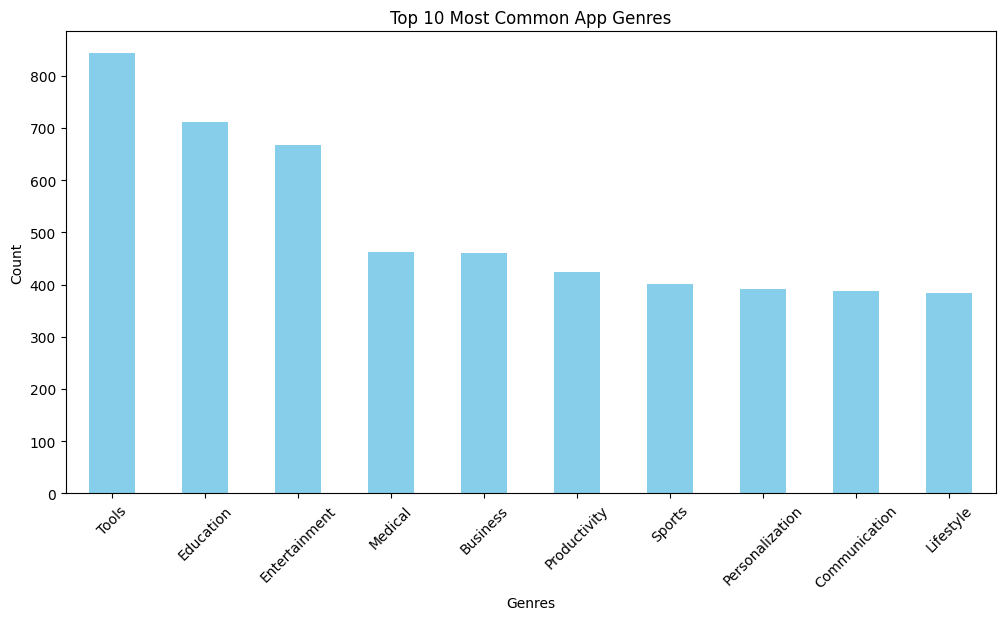

In [88]:
# Creating a count of genre combinations(Understanding how different genres are combined in apps.)
genre_counts = data['Genres'].str.get_dummies(sep=';').sum().sort_values(ascending=False)

# Bar plot of the most common genres
plt.figure(figsize=(12, 6))
genre_counts[:10].plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Common App Genres')
plt.xlabel('Genres')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [89]:
import pandas as pd
from google.colab import files
# Save the cleaned DataFrame to a CSV file
data.to_csv('cleaned_google_playstore_data.csv', index=False)

# Download the file
files.download('cleaned_google_playstore_data.csv')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [90]:
# Checking if 'Size' column is treated as strings before replacing characters
data['Size'] = data['Size'].astype(str)

# Remove 'M', 'k', and handle 'Varies with device' by replacing them
data['Size'] = data['Size'].str.replace('M', '').str.replace('k', '').str.replace('Varies with device', 'NaN')

# Convert the cleaned 'Size' column to numeric, setting invalid parsing as NaN
data['Size'] = pd.to_numeric(data['Size'], errors='coerce')

# Fill missing 'Size' values with the column mean
data['Size'].fillna(data['Size'].mean(), inplace=True)

# Final check of the cleaned dataset
df_cleaned_info = data.info()
df_cleaned_description = data.describe()

df_cleaned_info, df_cleaned_description



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          10841 non-null  float64
 3   Reviews         10840 non-null  float64
 4   Size            10841 non-null  float64
 5   Installs        10841 non-null  float64
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Success         10841 non-null  int64  
dtypes: float64(4), int64(1), object(6)
memory usage: 931.8+ KB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-90-b427a7e36c53>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Size'].fillna(data['Size'].mean(), inplace=True)


(None,
              Rating       Reviews          Size      Installs       Success
 count  10841.000000  1.084000e+04  10841.000000  1.084100e+04  10841.000000
 mean       4.193338  4.441529e+05     21.516165  1.546291e+07      0.763306
 std        0.499557  2.927761e+06     20.746847  8.502557e+07      0.425073
 min        1.000000  0.000000e+00      0.008301  0.000000e+00      0.000000
 25%        4.100000  3.800000e+01      5.900000  1.000000e+03      1.000000
 50%        4.200000  2.094000e+03     18.000000  1.000000e+05      1.000000
 75%        4.500000  5.477550e+04     26.000000  5.000000e+06      1.000000
 max       19.000000  7.815831e+07    100.000000  1.000000e+09      1.000000)

In [91]:
# Ensuring 'Price' is treated as a string before applying string methods
data['Price'] = data['Price'].astype(str)

# remove rows where 'Price' contains 'Everyone'
data = data[~data['Price'].str.contains('Everyone', na=False)]  # Remove rows where 'Price' contains 'Everyone'

# Remove '$' and ',' and convert 'Free' to '0', then convert to float
data['Price'] = data['Price'].str.replace('$', '', regex=False).str.replace(',', '', regex=False)  # Remove '$' and ','
data['Price'] = data['Price'].replace({'Free': '0'}, regex=False).astype(float)  # Replace 'Free' with '0' and convert to float

# Removing rows where 'Rating' is greater than 5 (outliers)
data = data[data['Rating'] <= 5]

# Convert 'Reviews' to numeric and fill NaN with mean
data['Reviews'] = pd.to_numeric(data['Reviews'], errors='coerce')
data['Reviews'].fillna(data['Reviews'].mean(), inplace=True)

# Fill missing values for 'Type' and 'Content Rating' with the mode
data['Type'].fillna(data['Type'].mode()[0], inplace=True)
data['Content Rating'].fillna(data['Content Rating'].mode()[0], inplace=True)

# Remove rows where 'Installs' is 0
data = data[data['Installs'] != 0]

# Final check of the cleaned dataset
df_cleaned_info = data.info()
df_cleaned_description = data.describe()

df_cleaned_info, df_cleaned_description


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-91-2ba0fa133c00>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Price'] = data['Price'].str.replace('$', '', regex=False).str.replace(',', '', regex=False)  # Remove '$' and ','
<ipython-input-91-2ba0fa133c00>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

<class 'pandas.core.frame.DataFrame'>
Index: 10825 entries, 0 to 10840
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10825 non-null  object 
 1   Category        10825 non-null  object 
 2   Rating          10825 non-null  float64
 3   Reviews         10825 non-null  float64
 4   Size            10825 non-null  float64
 5   Installs        10825 non-null  float64
 6   Type            10825 non-null  object 
 7   Price           10825 non-null  float64
 8   Content Rating  10825 non-null  object 
 9   Genres          10825 non-null  object 
 10  Success         10825 non-null  int64  
dtypes: float64(5), int64(1), object(5)
memory usage: 1014.8+ KB


(None,
              Rating       Reviews          Size      Installs         Price  \
 count  10825.000000  1.082500e+04  10825.000000  1.082500e+04  10825.000000   
 mean       4.191970  4.447684e+05     21.527142  1.548577e+07      0.917437   
 std        0.479239  2.929742e+06     20.751475  8.508631e+07     14.823668   
 min        1.000000  0.000000e+00      0.008301  1.000000e+00      0.000000   
 25%        4.100000  3.800000e+01      5.900000  5.000000e+03      0.000000   
 50%        4.200000  2.107000e+03     18.000000  1.000000e+05      0.000000   
 75%        4.500000  5.501100e+04     26.000000  5.000000e+06      0.000000   
 max        5.000000  7.815831e+07    100.000000  1.000000e+09    400.000000   
 
             Success  
 count  10825.000000  
 mean       0.762956  
 std        0.425289  
 min        0.000000  
 25%        1.000000  
 50%        1.000000  
 75%        1.000000  
 max        1.000000  )

In [92]:
# Handling extreme outliers in 'Reviews' and 'Installs'
# Setting an upper limit for 'Reviews' and 'Installs' to remove extreme outliers
# Reviews: Consider capping the maximum to the 99th percentile
reviews_cap = data['Reviews'].quantile(0.99)
data = data[data['Reviews'] <= reviews_cap]
# Installs: Consider capping the maximum to the 99th percentile
installs_cap = data['Installs'].quantile(0.99)
data = data[data['Installs'] <= installs_cap]
# Cap the 'Price' to avoid very high outliers (e.g., above $100)
price_cap = 100
data = data[data['Price'] <= price_cap]

# Final check of the cleaned dataset
df_cleaned_info = data.info()
df_cleaned_description = data.describe()

df_cleaned_info, df_cleaned_description


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<class 'pandas.core.frame.DataFrame'>
Index: 10637 entries, 0 to 10840
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10637 non-null  object 
 1   Category        10637 non-null  object 
 2   Rating          10637 non-null  float64
 3   Reviews         10637 non-null  float64
 4   Size            10637 non-null  float64
 5   Installs        10637 non-null  float64
 6   Type            10637 non-null  object 
 7   Price           10637 non-null  float64
 8   Content Rating  10637 non-null  object 
 9   Genres          10637 non-null  object 
 10  Success         10637 non-null  int64  
dtypes: float64(5), int64(1), object(5)
memory usage: 997.2+ KB


(None,
              Rating       Reviews          Size      Installs         Price  \
 count  10637.000000  1.063700e+04  10637.000000  1.063700e+04  10637.000000   
 mean       4.189780  2.066043e+05     21.273856  6.527519e+06      0.371478   
 std        0.482044  7.874689e+05     20.528370  1.959778e+07      2.521685   
 min        1.000000  0.000000e+00      0.008301  1.000000e+00      0.000000   
 25%        4.100000  3.600000e+01      5.800000  1.000000e+03      0.000000   
 50%        4.200000  1.929000e+03     18.000000  1.000000e+05      0.000000   
 75%        4.500000  4.769800e+04     26.000000  5.000000e+06      0.000000   
 max        5.000000  8.921451e+06    100.000000  1.000000e+08     89.990000   
 
             Success  
 count  10637.000000  
 mean       0.761305  
 std        0.426306  
 min        0.000000  
 25%        1.000000  
 50%        1.000000  
 75%        1.000000  
 max        1.000000  )

In [93]:
# Cap Reviews at the 99th percentile to remove extreme outliers
reviews_cap = data['Reviews'].quantile(0.99) # Changed 'data_latest' to 'data'
data = data[data['Reviews'] <= reviews_cap]  # Changed 'data_latest' to 'data'

# Cap Installs at the 99th percentile to remove extreme outliers
installs_cap = data['Installs'].quantile(0.99) # Changed 'data_latest' to 'data'
data = data[data['Installs'] <= installs_cap]  # Changed 'data_latest' to 'data'

# Cap Price at $50 to remove extreme outliers
price_cap = 50
data = data[data['Price'] <= price_cap]  # Changed 'data_latest' to 'data'

# Remove rows where Size is less than 1MB
data = data[data['Size'] >= 1]  # Changed 'data_latest' to 'data'


# Final check of the cleaned dataset
df_cleaned_info = data.info() # Changed 'data_latest' to 'data'
df_cleaned_description = data.describe() # Changed 'data_latest' to 'data'

df_cleaned_info, df_cleaned_description


<class 'pandas.core.frame.DataFrame'>
Index: 10211 entries, 0 to 10840
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10211 non-null  object 
 1   Category        10211 non-null  object 
 2   Rating          10211 non-null  float64
 3   Reviews         10211 non-null  float64
 4   Size            10211 non-null  float64
 5   Installs        10211 non-null  float64
 6   Type            10211 non-null  object 
 7   Price           10211 non-null  float64
 8   Content Rating  10211 non-null  object 
 9   Genres          10211 non-null  object 
 10  Success         10211 non-null  int64  
dtypes: float64(5), int64(1), object(5)
memory usage: 957.3+ KB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(None,
              Rating       Reviews          Size      Installs         Price  \
 count  10211.000000  1.021100e+04  10211.000000  1.021100e+04  10211.000000   
 mean       4.191302  1.504007e+05     21.737869  5.744164e+06      0.331746   
 std        0.482842  5.088790e+05     20.346625  1.753097e+07      1.966462   
 min        1.000000  0.000000e+00      1.000000  1.000000e+00      0.000000   
 25%        4.100000  3.700000e+01      6.400000  1.000000e+03      0.000000   
 50%        4.200000  2.067000e+03     19.000000  1.000000e+05      0.000000   
 75%        4.500000  4.718200e+04     26.000000  1.000000e+06      0.000000   
 max        5.000000  4.921451e+06    100.000000  1.000000e+08     46.990000   
 
             Success  
 count  10211.000000  
 mean       0.763294  
 std        0.425081  
 min        0.000000  
 25%        1.000000  
 50%        1.000000  
 75%        1.000000  
 max        1.000000  )

In [94]:
import pandas as pd
from google.colab import files
# Save the cleaned DataFrame to a CSV file
data.to_csv('cleaned_google_playstore_data1.csv', index=False)

# Download the file
files.download('cleaned_google_playstore_data1.csv')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [95]:
from google.colab import files

# This will open a dialog for you to upload your file
uploaded = files.upload()



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Saving cleaned_google_playstore_data1 (1).csv to cleaned_google_playstore_data1 (1) (1).csv


In [96]:
import pandas as pd

# Load the uploaded CSV into a pandas DataFrame
df = pd.read_csv('cleaned_google_playstore_data1 (1).csv')

# Display the first few rows
df.head()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Success
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19.0,10000.0,Free,0.0,Everyone,Art & Design,1
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7,5000000.0,Free,0.0,Everyone,Art & Design,1
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25.0,50000000.0,Free,0.0,Teen,Art & Design,1
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity,1


**Applying Machine learning techniques** like random forest regressor & XGboost for identifying key features influencing app installs,logistic regression for app success classification,FP growth for identifying frequently installed genre of apps and cosine similarity to develop a recommendation system

In [97]:
#RANDOM FOREST REGRESSION - FOR ANALYZING FACTORS INFLUENCING INSTALLS
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Drop unnecessary columns and define target variable
X = df.drop(['Installs', 'App', 'Success'], axis=1)  # Drop irrelevant columns
y = df['Installs']

# One-hot encode categorical features
X_encoded = pd.get_dummies(X, columns=['Category', 'Type', 'Content Rating', 'Genres'], drop_first=True)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Ensure train and test sets have the same columns
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

# Initialize Random Forest Regressor
rf = RandomForestRegressor(random_state=42)

# Fit the model on the training data
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf.predict(X_test)

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Output the results
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Root Mean Squared Error (RMSE): 7482791.091717083
R² Score: 0.8196366718300966


In [98]:
#Hyperparamater tuning - by applying log transformation to the target variable
y_log = np.log1p(y)  # log1p ensures log(0) is handled safely

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_log, test_size=0.2, random_state=42)

# Train the model with transformed target
rf.fit(X_train, y_train)

# Make predictions and convert back to original scale
y_pred_log = rf.predict(X_test)
y_pred = np.expm1(y_pred_log)  # Inverse log transformation

# Evaluate model performance
mse = mean_squared_error(np.expm1(y_test), y_pred)
rmse = np.sqrt(mse)
print(f"RMSE (Log-transformed model): {rmse}")
df['Log_Installs'] = np.log1p(df['Installs'])  # Use log1p to avoid log(0) errors
y = df['Log_Installs']  # Use log-transformed installs for modeling




/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


RMSE (Log-transformed model): 7752691.5687879585


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


RMSE: 7447612.216198703
R² Score: 0.8213285710571402


<Figure size 1000x800 with 0 Axes>

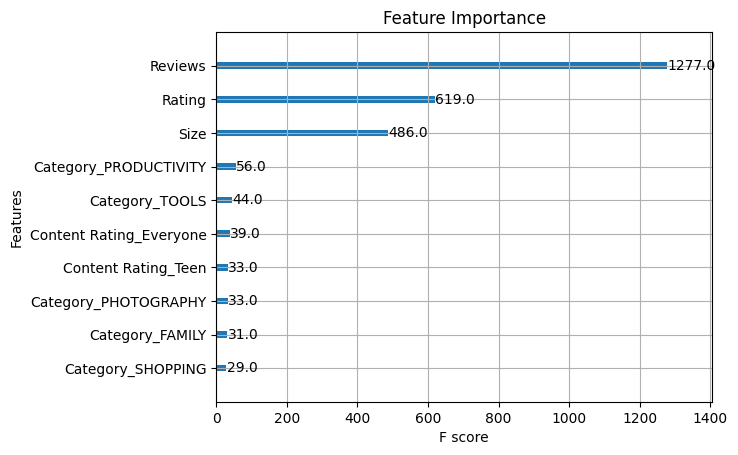

In [99]:
# XGBOOST ALGORITHM
#Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor, plot_importance
import matplotlib.pyplot as plt

# Load the cleaned dataset
df = pd.read_csv('cleaned_google_playstore_data1 (1).csv')



# Check for missing values and drop them if necessary
df = df.dropna()

# Define independent variables (X) and target variable (y)
X = df.drop(['Installs', 'App', 'Success'], axis=1)  # Adjust columns as per your dataset
y = df['Installs']

# One-hot encode categorical variables (if any)
X_encoded = pd.get_dummies(X, drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Initialize XGBoost regressor
xgb = XGBRegressor(random_state=42)

# Fit the model on training data
xgb.fit(X_train, y_train)

# Make predictions on the test data
y_pred = xgb.predict(X_test)

# Evaluate model performance
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f'RMSE: {rmse}')
print(f'R² Score: {r2}')

# Plot feature importance
plt.figure(figsize=(10, 8))
plot_importance(xgb, max_num_features=10, importance_type='weight')  # Top 10 features
plt.title('Feature Importance')
plt.show()


Feature importance is a measure that indicates how much each feature (or variable) in your dataset contributes to the prediction made by a machine learning model. In simple terms, it helps you understand which features are most important for predicting the target variable.

Market Basket Analysis (MBA) is a technique used to analyze the co-occurrence of items (in your case, app genres) in transactions (in our case, app installations)

In [100]:
import pandas as pd

# Load the cleaned dataset
data = pd.read_csv('cleaned_google_playstore_data1 (1).csv')

# Create a list of transactions
transactions = data['Genres'].str.split(',').tolist()  # Splitting by comma if multiple genres exist


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [101]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import fpgrowth, association_rules


# Load your cleaned dataset
data = pd.read_csv('cleaned_google_playstore_data1 (1).csv')

# Create a list of transactions
transactions = data['Genres'].str.split(',').tolist()  # Splitting by comma if multiple genres exist

# Create a TransactionEncoder object
te = TransactionEncoder()

# Fit the encoder to the transactions and transform the data
data_apriori = te.fit(transactions).transform(transactions)

# Convert the transformed data into a pandas DataFrame
data_apriori = pd.DataFrame(data_apriori, columns=te.columns_)


# Find frequent itemsets using FP-Growth
frequent_itemsets_fp = fpgrowth(data_apriori, min_support=0.01, use_colnames=True)  # Adjust min_support as needed

# Generate association rules
rules_fp = association_rules(frequent_itemsets_fp, metric="confidence", min_threshold=0.5)

print("Frequent Itemsets (FP-Growth):\n", frequent_itemsets_fp)
print("Association Rules (FP-Growth):\n", rules_fp)


Frequent Itemsets (FP-Growth):
      support                   itemsets
0   0.021741        (Books & Reference)
1   0.043776                 (Business)
2   0.030457            (Communication)
3   0.022819                   (Dating)
4   0.052199                (Education)
5   0.058368            (Entertainment)
6   0.034571                  (Finance)
7   0.012438             (Food & Drink)
8   0.032710         (Health & Fitness)
9   0.035648                (Lifestyle)
10  0.016159                   (Casual)
11  0.033199                   (Action)
12  0.013515                   (Puzzle)
13  0.019881                   (Arcade)
14  0.037313                   (Sports)
15  0.019587               (Simulation)
16  0.010577             (Role Playing)
17  0.043385                  (Medical)
18  0.026834                   (Social)
19  0.023700                 (Shopping)
20  0.031437              (Photography)
21  0.024385           (Travel & Local)
22  0.072667                    (Tools)
23  0.03

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


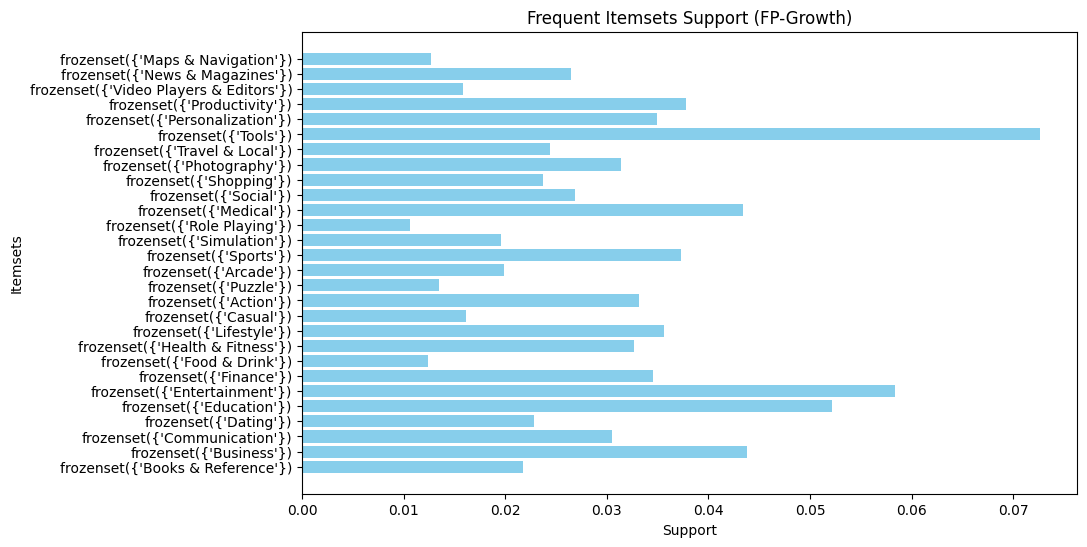

In [102]:
# Visualize the frequent itemsets
plt.figure(figsize=(10, 6))
plt.barh(frequent_itemsets_fp['itemsets'].astype(str), frequent_itemsets_fp['support'], color='skyblue')
plt.xlabel('Support')
plt.ylabel('Itemsets')
plt.title('Frequent Itemsets Support (FP-Growth)')
plt.show()

App Successful **Classification**

In [103]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, f1_score, classification_report
from sklearn.impute import SimpleImputer  # Import SimpleImputer

# Load the cleaned dataset
data = pd.read_csv('cleaned_google_playstore_data1 (1).csv')  # Adjust the path

# Check if the 'success' column exists, and if not, create it
if 'success' not in data.columns:
    data['success'] = (data['Installs'] >= 100000).astype(int) # 1 if Installs >= 100000, else 0
    print("Created 'success' column based on Installs.")

# Prepare features and target variable
X = data[['Installs', 'Rating', 'Reviews']]  # Include other relevant features
y = data['success']  # Binary target variable (1 for successful, 0 for unsuccessful)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Impute missing values using SimpleImputer with the mean strategy
imputer = SimpleImputer(strategy='mean') # Create an imputer instance
X_train = imputer.fit_transform(X_train) # Fit and transform on training data
X_test = imputer.transform(X_test) # Transform test data using the fitted imputer

# Initialize and fit the model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Make predictions
y_pred = log_reg.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Display the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("F1 Score:", f1)

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Created 'success' column based on Installs.
Accuracy: 1.0
Precision: 1.0
F1 Score: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       904
           1       1.00      1.00      1.00      1139

    accuracy                           1.00      2043
   macro avg       1.00      1.00      1.00      2043
weighted avg       1.00      1.00      1.00      2043



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [104]:
# Check for class imbalance
print("Class distribution in 'success' column:")
print(data['success'].value_counts(normalize=True))  # Shows the percentage of each class
# Modify features (without Installs) to avoid potential data leakage
X = data[['Rating', 'Reviews']]  # Exclude 'Installs'
y = data['success']
from sklearn.model_selection import cross_val_score

# Initialize the logistic regression model with class weights to handle imbalance
log_reg = LogisticRegression(class_weight='balanced', random_state=42)

# Perform 5-fold cross-validation and print the average scores
cv_accuracy = cross_val_score(log_reg, X, y, cv=5, scoring='accuracy').mean()
cv_precision = cross_val_score(log_reg, X, y, cv=5, scoring='precision').mean()
cv_f1 = cross_val_score(log_reg, X, y, cv=5, scoring='f1').mean()

print("Cross-Validation Accuracy:", cv_accuracy)
print("Cross-Validation Precision:", cv_precision)
print("Cross-Validation F1 Score:", cv_f1)



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Class distribution in 'success' column:
success
1    0.564391
0    0.435609
Name: proportion, dtype: float64
Cross-Validation Accuracy: 0.932230789255301
Cross-Validation Precision: 0.9772386935870735
Cross-Validation F1 Score: 0.9372378416505311


In [105]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the classes in the training data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
# Fit the model on balanced training data
log_reg.fit(X_train, y_train)

# Make predictions and calculate metrics
y_pred = log_reg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Display results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("F1 Score:", f1)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9310494362532524
Precision: 0.9689018464528668
F1 Score: 0.9261495587552253

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.97      0.94      1182
           1       0.97      0.89      0.93      1124

    accuracy                           0.93      2306
   macro avg       0.93      0.93      0.93      2306
weighted avg       0.93      0.93      0.93      2306



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


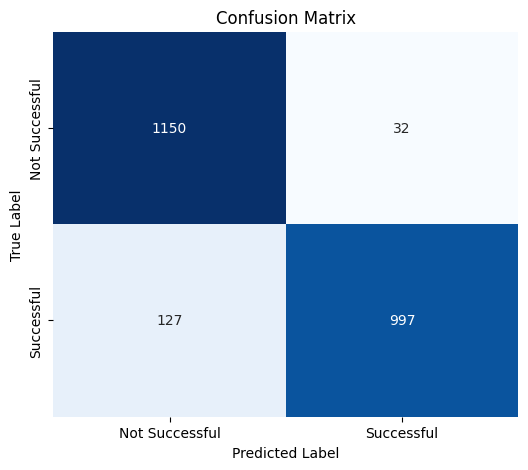

                precision    recall  f1-score   support

Not Successful       0.90      0.97      0.94      1182
    Successful       0.97      0.89      0.93      1124

      accuracy                           0.93      2306
     macro avg       0.93      0.93      0.93      2306
  weighted avg       0.93      0.93      0.93      2306



In [106]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Not Successful', 'Successful'],
            yticklabels=['Not Successful', 'Successful'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()
from sklearn.metrics import classification_report

# Print classification report for more detailed metrics
print(classification_report(y_test, y_pred, target_names=['Not Successful', 'Successful']))


App recommendation system Given that the Play Store dataset includes features like Category, Type, Content Rating, Genres, Reviews, etc., we'll focus on content-based filtering using cosine similarity.

In [107]:
# Import required libraries
import pandas as pd

# Load the dataset
df = pd.read_csv('cleaned_google_playstore_data1 (1).csv')

# Check the structure of the dataset
print(df.head())

# Display columns to identify useful features
print(df.columns)


                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

    Reviews  Size    Installs  Type  Price Content Rating  \
0     159.0  19.0     10000.0  Free    0.0       Everyone   
1     967.0  14.0    500000.0  Free    0.0       Everyone   
2   87510.0   8.7   5000000.0  Free    0.0       Everyone   
3  215644.0  25.0  50000000.0  Free    0.0           Teen   
4     967.0   2.8    100000.0  Free    0.0       Everyone   

                      Genres  Success  
0               Art & Design        1  
1  Art & Design;Pretend Play        0  
2               Art & Design    

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [108]:
# Combine relevant text-based features into a single string for each app
df['metadata'] = (df['Category'].astype(str) + ' ' +
                  df['Genres'].astype(str) + ' ' +
                  df['Content Rating'].astype(str))

# Drop duplicates (if any) to avoid recommendation bias
df = df.drop_duplicates(subset=['metadata'])

# Check the new metadata column
print(df[['App', 'metadata']].head())


                                               App  \
0   Photo Editor & Candy Camera & Grid & ScrapBook   
1                              Coloring book moana   
3                            Sketch - Draw & Paint   
4            Pixel Draw - Number Art Coloring Book   
22         Superheroes Wallpapers | 4K Backgrounds   

                                             metadata  
0                ART_AND_DESIGN Art & Design Everyone  
1   ART_AND_DESIGN Art & Design;Pretend Play Everyone  
3                    ART_AND_DESIGN Art & Design Teen  
4     ART_AND_DESIGN Art & Design;Creativity Everyone  
22           ART_AND_DESIGN Art & Design Everyone 10+  


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [109]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF vectorizer
tfidf = TfidfVectorizer(stop_words='english')

# Fit and transform the metadata into TF-IDF vectors
tfidf_matrix = tfidf.fit_transform(df['metadata'])

# Check the shape of the TF-IDF matrix
print(tfidf_matrix.shape)


(291, 86)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [110]:
from sklearn.metrics.pairwise import cosine_similarity

# Compute the cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Check the shape of the similarity matrix
print(cosine_sim.shape)


(291, 291)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [111]:
# Reset the DataFrame index to align with the cosine similarity matrix
df = df.reset_index(drop=True)

# Create a reverse map of indices and app names
indices = pd.Series(df.index, index=df['App']).drop_duplicates()

# Recommendation function
def get_recommendations(app_name, cosine_sim=cosine_sim, n=5):
    # Get the index of the app
    # Convert app_name to lowercase to handle case sensitivity
    app_name = app_name.lower()

    # Convert indices to lowercase for comparison
    lower_indices = indices.index.str.lower()

    # Check if app_name is in the lowercased indices
    if app_name in lower_indices:
        idx = indices[indices.index.str.lower() == app_name].iloc[0]
    else:
        print(f"App '{app_name}' not found in the dataset.")
        return []  # Return an empty list if app not found

    # Get the similarity scores for this app
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the apps based on similarity scores in descending order
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the indices of the top 'n' similar apps (excluding the queried app)
    sim_indices = [i[0] for i in sim_scores[1:n+1]]

    # Return the top similar apps
    return df['App'].iloc[sim_indices]

# Test the recommendation function
print(get_recommendations('Sketch - Draw & Paint', n=5))
print(get_recommendations('Monster Truck Stunt 3D 2019', n=5))
print(get_recommendations('Hush - Beauty for Everyone', n=5))

0    Photo Editor & Candy Camera & Grid & ScrapBook
4           Superheroes Wallpapers | 4K Backgrounds
3             Pixel Draw - Number Art Coloring Book
5                            Mcqueen Coloring pages
1                               Coloring book moana
Name: App, dtype: object
8              Police Detector (Speed Camera Radar)
7     Android Auto - Maps, Media, Messaging & Voice
0    Photo Editor & Candy Camera & Grid & ScrapBook
1                               Coloring book moana
2                             Sketch - Draw & Paint
Name: App, dtype: object
11                         Wrinkles and rejuvenation
10     Selfie Camera Photo Editor & Filter & Sticker
12               Secrets of beauty, youth and health
0     Photo Editor & Candy Camera & Grid & ScrapBook
1                                Coloring book moana
Name: App, dtype: object


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [112]:
import difflib

# Interactive recommendation system
while True:
    app_name = input("Enter an app name (or 'exit' to quit): ")
    if app_name.lower() == 'exit':
        break

    # Convert user input to lowercase for case-insensitive matching
    app_name_lower = app_name.lower()

    # Check for exact match in a case-insensitive manner
    if app_name_lower in df['App'].str.lower().values:
        print(f"Recommendations for '{app_name}':")
        print(get_recommendations(app_name, n=5))
    else:
        # Suggest close matches if the exact app is not found
        close_matches = difflib.get_close_matches(app_name, df['App'].tolist(), n=3, cutoff=0.6)
        if close_matches:
            print("App not found. Did you mean:")
            for match in close_matches:
                print(f"- {match}")
        else:
            print("App not found. Please try again.")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Enter an app name (or 'exit' to quit): Secrets of beauty, youth and health
Recommendations for 'Secrets of beauty, youth and health':
9                         Hush - Beauty for Everyone
11                         Wrinkles and rejuvenation
10     Selfie Camera Photo Editor & Filter & Sticker
245                        AP Art History Flashcards
258                       Blood Domination - BL Game
Name: App, dtype: object
Enter an app name (or 'exit' to quit): exit
